In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\nandi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load dataset
dataset=pd.read_csv('D:\AI\Sem 1\AI Algo\Project\Dataset\CancerPScreenRaw2020.csv')
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,271.996240,235.070094,0.752483,36.034604,11.808232,4.092972,33.969549,63.846127,93.722704,0.0
1,223.724058,224.347244,0.824954,33.601107,10.770778,2.322102,30.433429,58.544756,86.656083,0.0
2,246.553358,213.081332,0.682095,32.663880,10.703675,3.710110,30.791993,57.873877,84.955761,0.0
3,207.353626,209.644809,0.720148,32.415557,9.530960,2.157191,29.610676,57.064161,84.517647,0.0
4,207.353626,209.644809,0.720148,32.415557,9.530960,2.157191,29.610676,57.064161,84.517647,0.0


In [3]:
# importing package
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
cap2 = pp.ProfileReport(dataset)
cap2.to_file('cap2.html')
display(IFrame('cap2.html', width=900, height=350))

In [4]:
#Summary of N/A Values
dataset.isnull().sum()

V1       10
V2       10
V3       10
V4       10
V5       10
V6       10
V7       10
V8       10
V9       10
Class    10
dtype: int64

In [5]:
#Drop rows where all cells in that row is NA
dataset = dataset.dropna(how='all',axis=0).reset_index(drop = True)
dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,271.996240,235.070094,0.752483,36.034604,11.808232,4.092972,33.969549,63.846127,93.722704,0.0
1,223.724058,224.347244,0.824954,33.601107,10.770778,2.322102,30.433429,58.544756,86.656083,0.0
2,246.553358,213.081332,0.682095,32.663880,10.703675,3.710110,30.791993,57.873877,84.955761,0.0
3,207.353626,209.644809,0.720148,32.415557,9.530960,2.157191,29.610676,57.064161,84.517647,0.0
4,207.353626,209.644809,0.720148,32.415557,9.530960,2.157191,29.610676,57.064161,84.517647,0.0
...,...,...,...,...,...,...,...,...,...,...
1675,149.088971,159.661076,0.675176,23.458321,8.938000,59.159182,21.873173,-15.412836,-52.698846,2.0
1676,153.203474,164.067344,0.693809,24.105715,9.184668,60.791836,22.476821,-15.838194,-54.153209,2.0
1677,138.008265,153.870445,0.673809,22.985824,8.175149,61.182554,21.391324,-18.399906,-58.191137,2.0
1678,138.008265,153.870445,0.673809,22.985824,8.175149,61.182554,21.391324,-18.399906,-58.191137,2.0


In [6]:
#Tukey Method

# import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# List of Outliers
Outliers_to_drop = detect_outliers(dataset.drop('Class',axis=1),0,list(dataset.drop('Class',axis=1)))
dataset.drop('Class',axis=1).loc[Outliers_to_drop]

,V1,V2,V3,V4,V5,V6,V7,V8,V9
560,476.426612,322.386873,0.850293,46.666363,17.256893,23.699211,43.219864,62.740516,82.261169
561,472.345889,314.954572,0.883631,45.073220,17.613278,27.259269,43.288320,59.317371,75.346422
562,443.833590,309.803533,0.857603,43.206179,17.007015,37.726836,41.485828,45.244820,49.003812
563,442.081040,309.071137,0.857025,42.796644,16.176084,28.992396,41.472420,53.952445,66.432469
565,440.331958,314.216109,0.826656,45.958020,15.423139,3.952445,41.445612,78.938779,116.431946
...,...,...,...,...,...,...,...,...,...
1677,138.008265,153.870445,0.673809,22.985824,8.175149,61.182554,21.391324,-18.399906,-58.191137
1678,138.008265,153.870445,0.673809,22.985824,8.175149,61.182554,21.391324,-18.399906,-58.191137
1679,141.816967,158.116906,0.692404,23.620178,8.400764,62.871048,21.981674,-18.907700,-59.797074
601,376.669151,275.606406,0.757999,40.083364,13.993352,2.131052,38.701605,75.272158,111.842711


In [7]:
#Create New Dataset without Outliers
dataset = dataset.drop(dataset.index[Outliers_to_drop]).reset_index(drop = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1560 non-null   float64
 1   V2      1560 non-null   float64
 2   V3      1560 non-null   float64
 3   V4      1560 non-null   float64
 4   V5      1560 non-null   float64
 5   V6      1560 non-null   float64
 6   V7      1560 non-null   float64
 7   V8      1560 non-null   float64
 8   V9      1560 non-null   float64
 9   Class   1560 non-null   float64
dtypes: float64(10)
memory usage: 122.0 KB


In [8]:
# importing package
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
cap2 = pp.ProfileReport(dataset)
cap2.to_file('cap2.html')
display(IFrame('cap2.html', width=900, height=350))

In [9]:
#Show Key Statistics
dataset.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
count,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,190.630841,178.769031,0.635989,26.685542,8.984003,12.347625,24.667997,36.988370,49.308742,0.978205
std,75.396427,35.750096,0.071756,4.852122,2.211419,8.480083,5.013207,12.714660,21.943172,0.818821
min,77.506035,106.435661,0.451309,16.586642,4.780299,0.404557,14.655575,3.326351,-13.607345,0.000000
25%,125.265708,150.712853,0.584654,22.959222,7.218856,5.361532,20.835932,28.008704,34.521055,0.000000
50%,173.241514,174.114809,0.637838,26.091306,8.774178,10.614368,23.582325,36.584904,50.341177,1.000000
75%,245.821456,204.261594,0.682171,29.905825,10.549153,17.867986,28.426086,45.762494,64.471288,2.000000
max,416.523193,281.232571,0.835766,39.746384,15.531709,38.616223,38.669230,70.747750,104.417938,2.000000


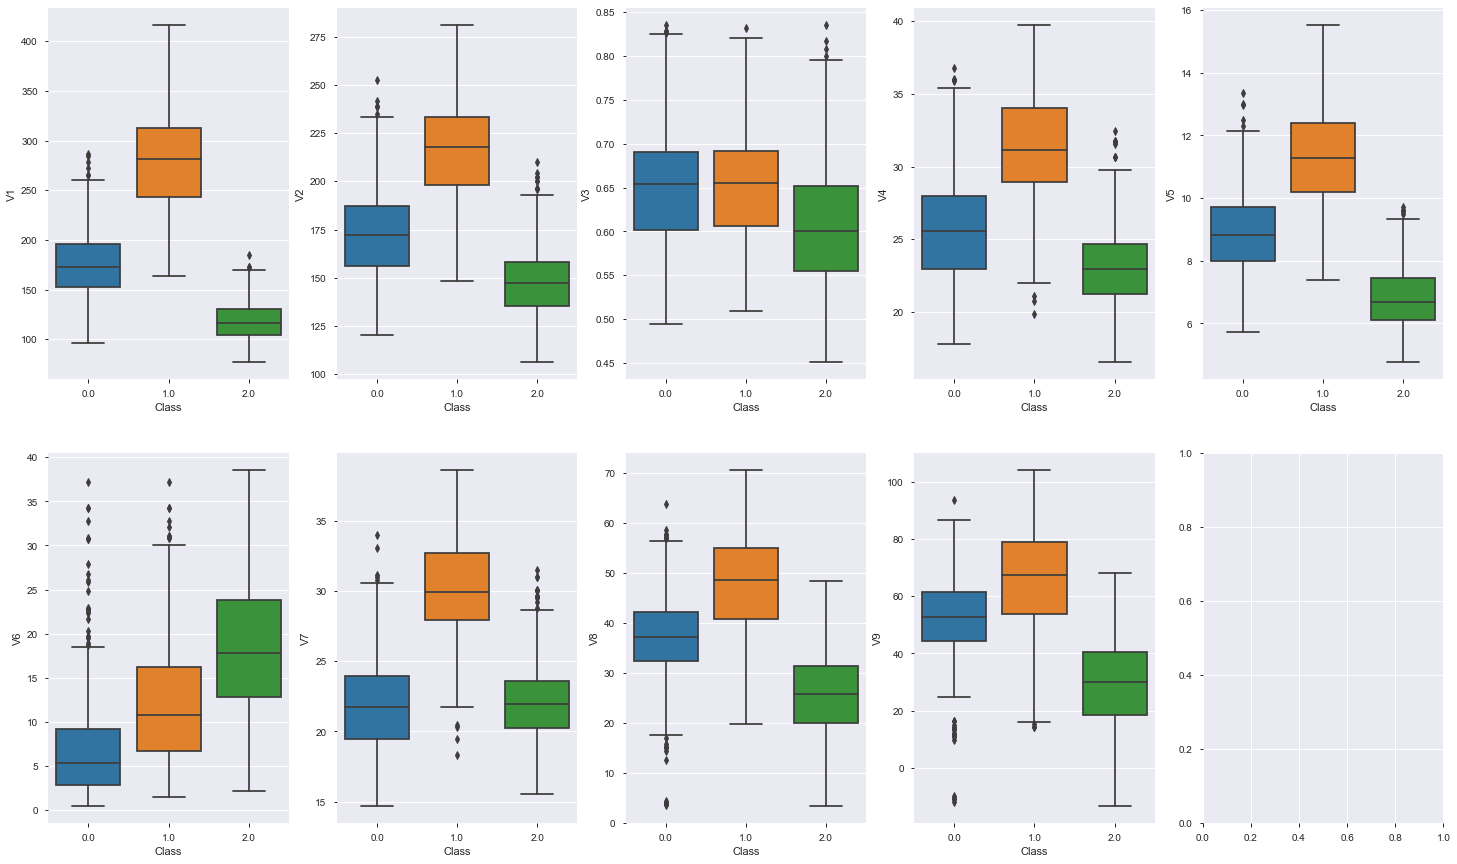

In [10]:
fig,ax=plt.subplots(nrows=2 ,ncols=5)

sns.boxplot(data=dataset,y='V1',x='Class',ax=ax[0,0])
sns.boxplot(data=dataset,y='V2',x='Class',ax=ax[0,1])
sns.boxplot(data=dataset,y='V3',x='Class',ax=ax[0,2])
sns.boxplot(data=dataset,y='V4',x='Class',ax=ax[0,3])
sns.boxplot(data=dataset,y='V5',x='Class',ax=ax[0,4])
sns.boxplot(data=dataset,y='V6',x='Class',ax=ax[1,0])
sns.boxplot(data=dataset,y='V7',x='Class',ax=ax[1,1])
sns.boxplot(data=dataset,y='V8',x='Class',ax=ax[1,2])
sns.boxplot(data=dataset,y='V9',x='Class',ax=ax[1,3])

fig.set_figwidth(25)
fig.set_figheight(15)

Class Split
0.0    540
1.0    514
2.0    506
Name: Class, dtype: int64


Text(0, 0.5, 'Count')

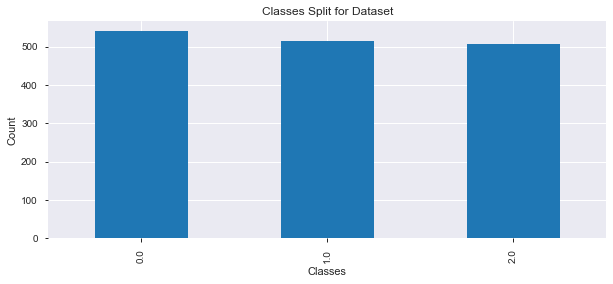

In [11]:
#Class Balance
print('Class Split')
print(dataset['Class'].value_counts())
dataset['Class'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

In [12]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(dataset,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: [('V2', 'V1'), ('V4', 'V1'), ('V4', 'V2'), ('V5', 'V1'), ('V5', 'V2'), ('V5', 'V4'), ('V7', 'V1'), ('V7', 'V2'), ('V7', 'V4'), ('V9', 'V8')]


<AxesSubplot:>

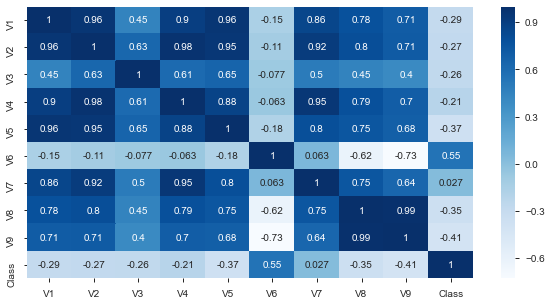

In [13]:
# Visualization of Correlations
fig = plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(),annot=True,cmap="Blues")

In [14]:
#Create x and y variables
x = dataset.drop('Class', axis=1).values
Y = dataset['Class'].values

# Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.20,stratify=Y,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.fit_transform(x_test)

x_2 = sc.fit_transform(x)

#Import Model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import  RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline
alpha=0.5
pipeline =[]


pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(multi_class='multinomial',solver='newton-cg',
                                               random_state=100,max_iter=1000))])
pipeline.insert(0,pipe_logreg)


pipe_svm = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC())])
pipeline.insert(1,pipe_svm)

pipe_ridge= Pipeline([('scl', StandardScaler()),
                     ('clf', RidgeClassifier(alpha=alpha, random_state=100))])
pipeline.insert(2,pipe_ridge)

# Set grid search params 

modelpara =[]


param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l2'],
                   'clf__solver':['newton-cg', 'sag', 'saga' , 'lbfgs']}
modelpara.insert(0,param_gridlogreg)

param_gridsvm = { 
           "clf__kernel" : ['linear', 'poly', 'rbf', 'sigmoid']}
modelpara.insert(1,param_gridsvm)

param_gridridge = {'clf__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20]}
modelpara.insert(2,param_gridridge)




In [16]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train2, 
                                                            y=y_train,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',
                                                            n_jobs=1,random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training recall')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation recall')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.ylim([0.6, 1.0])
    plt.show()
    train_scores_mean = train_scores.mean(axis = 1)
    test_scores_mean = test_scores.mean(axis = 1)
    print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
    print('\n', '-' * 20) # separator
    print('\nMean validation scores\n\n',pd.Series(test_scores_mean, index = train_sizes))

Logistic Regression Learning Curve


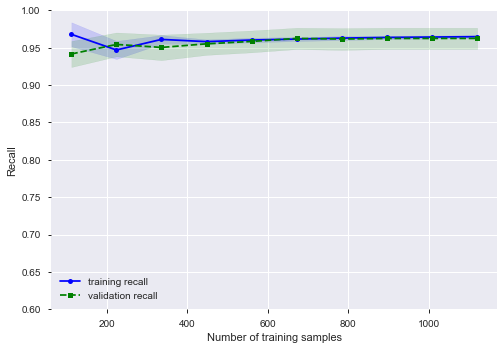

Mean training scores

 112     0.967857
224     0.946875
336     0.961012
448     0.958036
560     0.960179
672     0.961458
784     0.962755
896     0.963616
1008    0.964187
1121    0.964674
dtype: float64

 --------------------

Mean validation scores

 112     0.941514
224     0.954315
336     0.950302
448     0.955108
560     0.958321
672     0.962340
784     0.961540
896     0.962340
1008    0.962347
1121    0.962347
dtype: float64
Leaning Curve - Ridge


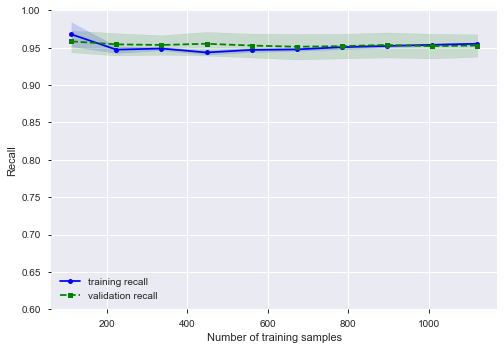

Mean training scores

 112     0.967857
224     0.947321
336     0.948810
448     0.943527
560     0.946964
672     0.947619
784     0.950638
896     0.952232
1008    0.953770
1121    0.955219
dtype: float64

 --------------------

Mean validation scores

 112     0.958385
224     0.954422
336     0.953571
448     0.955222
560     0.952810
672     0.951222
784     0.952035
896     0.953635
1008    0.952029
1121    0.952810
dtype: float64
Leaning Curve - SVM


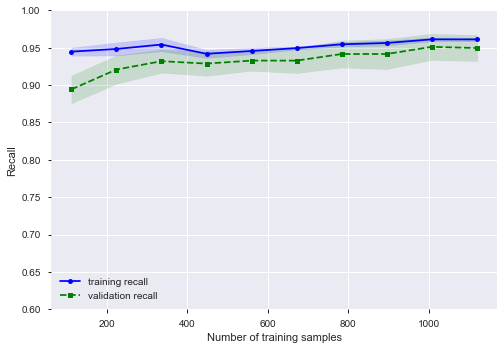

Mean training scores

 112     0.944643
224     0.948214
336     0.954167
448     0.941741
560     0.945536
672     0.949405
784     0.954464
896     0.956250
1008    0.961111
1121    0.961017
dtype: float64

 --------------------

Mean validation scores

 112     0.894183
224     0.920693
336     0.931862
448     0.928674
560     0.932681
672     0.932642
784     0.941475
896     0.941469
1008    0.951076
1121    0.949482
dtype: float64


In [17]:
#Plot Learning Curve


print('Logistic Regression Learning Curve')
plot_learning_curves(pipe_logreg)
print('Leaning Curve - Ridge')
plot_learning_curves(pipe_ridge)
print('Leaning Curve - SVM')
plot_learning_curves(pipe_svm)


Model Evaluation - Accuracy Score
Logistic Regression 0.97 +/- 0.02
Support Vector Machines 0.84 +/- 0.03
Ridge 0.96 +/- 0.02




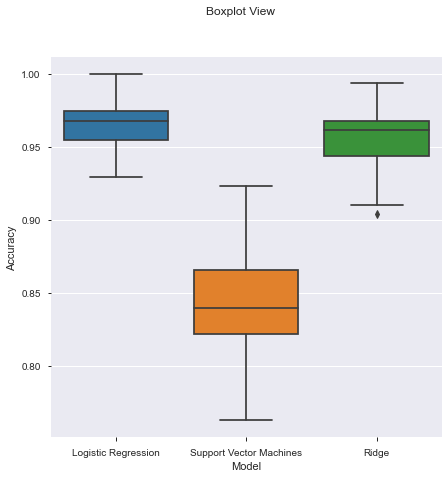

In [18]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]

models.append(('Logistic Regression',pipe_logreg))
models.append(('Support Vector Machines',SVC(gamma='auto')))
models.append(('Ridge',pipe_ridge))


#Model Evaluation
results =[]
names=[]
scoring ='accuracy'
print('Model Evaluation - Accuracy Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,Y,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

fig = plt.figure(figsize=(7,7))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [19]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, n_jobs=1, cv=cv2,scoring='accuracy')
    gs_clf = gs_clf.fit(x_train2, y_train)
    model = gs_clf.best_estimator_
    
    #Nested CV
    scoreACC = cross_val_score(gs_clf, x_2, Y, 
                             scoring='accuracy', cv=5,
                             n_jobs= -1)
    
    scorePM = cross_val_score(gs_clf, x_2, Y, 
                             scoring='precision_weighted', cv=5,
                             n_jobs= -1)
    
    scoreRM = cross_val_score(gs_clf, x_2, Y, 
                             scoring='recall_weighted', cv=5,
                             n_jobs= -1)
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test2)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
        
    #Output Validation Statistics
    print('\nBest Parameters:',bestpara)
    target_names=['Class 0','Class 1','Class 2']
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names)) 
    print('\nNestedCV Accuracy(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreACC),np.std(scoreACC)))
    print('NestedCV Precision(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scorePM),np.std(scorePM)))
    print('NestedCV Recall(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreRM),np.std(scoreRM)))
    print('\n')    

In [20]:
#Run Models

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)


Optimized Model

Model Name: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=100, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

Best Parameters: {'clf__C': 100, 'clf__penalty': 'l2', 'clf__solver': 'saga'}

 [[105   0   3]
 [  0 103   0]
 [  2   0  99]]

               precision    recall  f1-score   support

     Class 0       0.98      0.97      0.98       108
     Class 1       1.00      1.00      1.00       103
     Class 2       0.97      0.98      0.98       101

    accuracy                           0.98       312
   macro avg       0.98      0.98      0.98       312
weighted avg       0.98      0.98      0.98       312


NestedCV Accuracy(weighted) :0.93 +/-0.07 
NestedCV Precision(weighted) :0.94 +/-0.06 
NestedCV Recall(weighted) :0.93 +/-

Logistic Regression

Permutation Importance




Using TensorFlow backend.


Weight,Feature
0.3385 ± 0.0424,V7
0.2173 ± 0.0204,V6
0.2147 ± 0.0287,V4
0.1955 ± 0.0107,V1
0.1372 ± 0.0312,V5
0.0564 ± 0.0261,V3
0.0513 ± 0.0287,V8
0.0263 ± 0.0124,V2
0.0141 ± 0.0087,V9


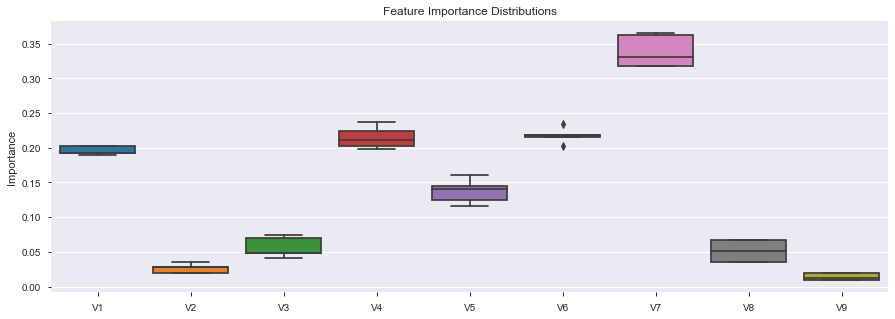

Support Vector Machines

Permutation Importance




Weight,Feature
0.2263 ± 0.0288,V7
0.1865 ± 0.0293,V1
0.1609 ± 0.0220,V6
0.1333 ± 0.0355,V5
0.0955 ± 0.0164,V4
0.0718 ± 0.0386,V3
0.0615 ± 0.0234,V2
0.0103 ± 0.0110,V8
0.0083 ± 0.0051,V9


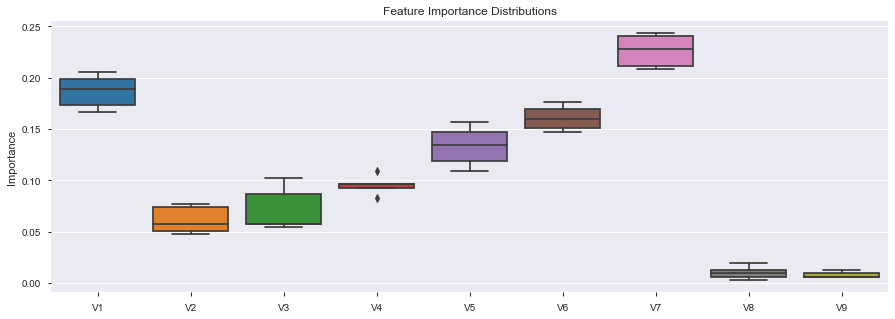

Ridge

Permutation Importance




Weight,Feature
0.3821 ± 0.0204,V7
0.3679 ± 0.0279,V2
0.2801 ± 0.0305,V4
0.2737 ± 0.0496,V5
0.2673 ± 0.0165,V6
0.1622 ± 0.0571,V1
0.0936 ± 0.0510,V8
0.0724 ± 0.0144,V3
0.0301 ± 0.0065,V9


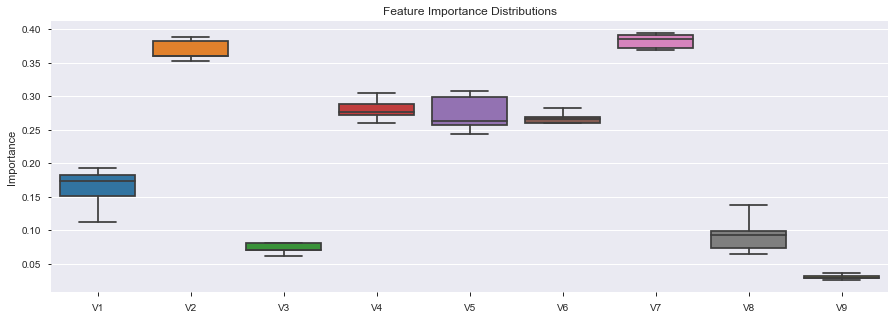

In [21]:
#Next Steps - Feature Importance
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import display

for name, model in models:
    print(name)
    perm=PermutationImportance(model.fit(x_train2,y_train),random_state=100).fit(x_test2,y_test)
    features=dataset.drop('Class',axis=1).columns
    print('\nPermutation Importance')
    print('\n')
    df=eli5.show_weights(perm,feature_names=dataset.drop('Class',axis=1).columns.tolist())
    display(df) 
    df2= pd.DataFrame(data=perm.results_,columns=features)
    fig = plt.figure(figsize=(15,5))
    sns.boxplot(data=df2).set(title='Feature Importance Distributions',
                             ylabel='Importance')
    plt.show()

In [22]:
#Next Steps - Feature Selection using SelectFromModel
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
clf =  RandomForestClassifier(max_depth = 2)
clf.fit(x_train2,y_train)
model2 = SelectFromModel(clf, prefit=True)
feature_idx = model2.get_support()
feature_name = dataset.drop('Class',axis=1).columns[feature_idx]
print('\nKey Features:',feature_name)


Key Features: Index(['V1', 'V2'], dtype='object')
